# Assignment 3

## Problem 1 [20 Points]

Consider a Bayesian model with parameters $\theta$ for which you want to maximize its marginal log-likelihood $\log p(\mathcal{D})$ given some observed data $\mathcal{D}$. As this objective is generally intractable, assume a variational approximation to
the posterior by introducing an auxiliary distribution $q(\theta\lvert\mathcal{D})$.

(1) Please derive the following inequality
:
$\log p(\mathcal{D}) \geq \mathbb{E}_{q(\theta\lvert\mathcal{D})}\log p(\mathcal{D}\lvert \theta) + \mathbb{E}_{q(\theta\lvert\mathcal{D})}\log p(\theta) - \mathbb{E}_{q(\theta\lvert\mathcal{D})}\log q(\theta\lvert\mathcal{D}) $

### Answer

\begin{align}
    \log p(\mathcal{D}) &= \log \int_{\theta} p(\mathcal{D}, \theta) \\
                        &= \log \int_{\theta} p(\mathcal{D}, \theta) \frac{q(\theta \vert \mathcal{D})}{q(\theta \vert \mathcal{D})} \\
                        &= \log \left( \mathbb{E}_{q(\theta \vert \mathcal{D})} \left[\frac{ p(\mathcal{D}, \theta)}{q(\theta \vert \mathcal{D})}\right] \right)
\end{align}

Now, by Jensen's inequality, we have that when a function is concave,
\begin{align}
    f(\mathbb{E}[x]) \geq \mathbb{E}[f(x)]
\end{align}

Therefore, we can write
\begin{align}
    \log p(\mathcal{D}) &\geq \mathbb{E}_{q(\theta \vert \mathcal{D})} [\log  p(\mathcal{D}, \theta)] - \mathbb{E}_{q(\theta \vert \mathcal{D})} [\log q(\theta \vert \mathcal{D})] \\
\implies \log p(\mathcal{D}) &\geq \mathbb{E}_{q(\theta \vert \mathcal{D})} [\log  p(\mathcal{D}\vert \theta) p(\theta)] - \mathbb{E}_{q(\theta \vert \mathcal{D})} [\log q(\theta \vert \mathcal{D})] \\
\implies \log p(\mathcal{D}) &\geq \mathbb{E}_{q(\theta\lvert\mathcal{D})}\log p(\mathcal{D}\lvert \theta) + \mathbb{E}_{q(\theta\lvert\mathcal{D})}\log p(\theta) - \mathbb{E}_{q(\theta\lvert\mathcal{D})}\log q(\theta\lvert\mathcal{D})
\end{align}

---

(2) Show that the above inequality becomes an equality when the KL divergence between the true posterior and your variational posterior becomes 0, i.e.

$$\mathbb{KL}[q(\theta\lvert\mathcal{D})||p(\theta\lvert \mathcal{D})] = 0$$

### Answer

We can write the KL divergence as
\begin{align}
    \mathbb{KL} (q || p) &= \mathbb{E}_q \left[ \log \frac{q(\theta\lvert\mathcal{D})}{p(\theta \vert \mathcal{D})} \right] \\
    &= \mathbb{E}_{q(\theta\lvert\mathcal{D})} [\log q(\theta\lvert\mathcal{D})] - \mathbb{E}_{q(\theta\lvert\mathcal{D})} [\log p(\theta | \mathcal{D})] \\
    &= \mathbb{E}_{q(\theta\lvert\mathcal{D})} [\log q(\theta\lvert\mathcal{D})] - \mathbb{E}_{q(\theta\lvert\mathcal{D})} [\log\left(\frac{p(\mathcal{D} | \theta) p(\theta)}{p(\mathcal{D})}\right)] \\
    &= \mathbb{E}_{q(\theta\lvert\mathcal{D})}\log q(\theta\lvert\mathcal{D}) - \mathbb{E}_{q(\theta\lvert\mathcal{D})}\log p(\mathcal{D}\lvert \theta) - \mathbb{E}_{q(\theta\lvert\mathcal{D})}\log p(\theta) + \log p(\mathcal{D})
\end{align}

If $\mathbb{KL}[q(\theta\lvert\mathcal{D})||p(\theta\lvert \mathcal{D})] = 0$, 
\begin{align}
\mathbb{E}_{q(\theta\lvert\mathcal{D})}\log q(\theta\lvert\mathcal{D}) - \mathbb{E}_{q(\theta\lvert\mathcal{D})}\log p(\mathcal{D}\lvert \theta) - \mathbb{E}_{q(\theta\lvert\mathcal{D})}\log p(\theta) + \log p(\mathcal{D}) = 0\\
\implies \log p(\mathcal{D}) = \mathbb{E}_{q(\theta\lvert\mathcal{D})}\log p(\mathcal{D}\lvert \theta) + \mathbb{E}_{q(\theta\lvert\mathcal{D})}\log p(\theta) - \mathbb{E}_{q(\theta\lvert\mathcal{D})}\log q(\theta\lvert\mathcal{D})
\end{align}

---

(3) One way to design a more flexible variational approximation beyond the mean-field familty is by considering an invertible transformation $f_{\phi}: \mathcal{Z} \to \mathcal{\Theta}$, where $\phi$ denotes the parameters of the invertible transformation.Using the change of variables formula, we can obtain a variational approximation $q_{\phi}(\theta | \mathcal{D})$ that is easy to sample from and easy to evaluate as

\begin{align}
    \theta &= f(z), \quad \text{with}\; z \sim p_z(z), \\
    q_{\phi} (\theta | \mathcal{D}) &= p_z(f_{\phi}^{-1}(\theta)) | \mathrm{det} \nabla_\theta (f_{\phi}^{-1} (\theta))|.
\end{align}

Derive a tractable optimization objective for identifying the optimal parameters $\phi$ via gradient-based optimization assuming that $p_z = \mathcal{N}(0, I)$.

### Answer

Following earlier, we can show that our variational approximation $q_{\phi}(\theta | \mathcal{D})$ would need to maximize the ELBO:

\begin{align}
    \phi^\star &= \mathrm{argmax}_{\phi} \left[\mathbb{E}_{q(\theta\lvert\mathcal{D})}\log p(\mathcal{D}\lvert \theta) + \mathbb{E}_{q(\theta\lvert\mathcal{D})}\log p(\theta) - \mathbb{E}_{q(\theta\lvert\mathcal{D})}\log q(\theta\lvert\mathcal{D})\right] \\
    \phi^\star &= \mathrm{argmax}_{\phi} \left[\mathbb{E}_{z \sim p_z (z)}\log p(\mathcal{D}\lvert f_{\phi} (z)) + \mathbb{E}_{z \sim p_z (z)} \log p(f_{\phi}(z)) - \mathbb{E}_{q(\theta\lvert\mathcal{D})} \log (p_z(f_{\phi}^{-1}(\theta)) | \mathrm{det} \nabla_\theta (f_{\phi}^{-1} (\theta))|)\right] \\
    \phi^\star &= \mathrm{argmax}_{\phi} \left[\mathbb{E}_{z \sim p_z (z)}\log p(\mathcal{D}\lvert f_{\phi} (z)) + \mathbb{E}_{z \sim p_z (z)} \log p(f_{\phi}(z)) - \mathbb{E}_{z \sim p_z(z)} \log (p_z(f_{\phi}^{-1}(f_{\phi}(z)))) - \mathbb{E}_{z \sim p_z(z)} \log | \mathrm{det} (\nabla_z (f_{\phi} (z)))^{-1}|\right] \\
    \phi^\star &= \mathrm{argmax}_{\phi} \left[\mathbb{E}_{z \sim p_z (z)}\log p(\mathcal{D}\lvert f_{\phi} (z)) + \mathbb{E}_{z \sim p_z (z)} \log p(f_{\phi}(z)) - \mathbb{E}_{z \sim p_z(z)} \log (p_z(z)) + \mathbb{E}_{z \sim p_z(z)} \log | \mathrm{det} \nabla_z (f_{\phi} (z))|\right]
\end{align}

From above, we can use either Equation (2) or Equation (4) for evaluating the loss function. A main objective we want to pursue is ensuring that we can compute the determinant of the Jacobian easily (by choosing invertible transformations whose Jacobian matrix is diagonal or lower triangluar, see for e.g. the [RealNVP](https://arxiv.org/pdf/1605.08803.pdf) architecture). Dropping terms that aren't dependent on $\phi$, we have that the objective function to maximize is
\begin{align}
    \mathcal{L}(\phi) = \mathbb{E}_{z \sim p_z (z)}\log p(\mathcal{D}\lvert f_{\phi} (z)) + \mathbb{E}_{z \sim p_z (z)} \log p(f_{\phi}(z)) + \mathbb{E}_{z \sim p_z(z)} \log | \mathrm{det} \nabla_z (f_{\phi} (z))|
\end{align}

The expectations above can be calculated suitably by Monte Carlo.

## Problem 2 [40 Points]

Recall HW2 Question 2, where you derived the conditional distribution of a Bayesian regression model with a likelihood $p(y\lvert x, \alpha, \beta, \gamma)$ corresponding to a linear observation model is $y = \alpha x + \beta + \epsilon$. Noting that $\gamma$ represents the noise level in the observed data, i.e. it corresponds to the precision of the data likelihood. In this case, the likelihood can be further expressed as:

$p(y\lvert x, \alpha, \beta, \gamma) = (\sqrt{\frac{\gamma}{2\pi}})^n\exp(-\frac{\gamma(\sum_{i=1}^n\|y_i - x_i\alpha - \beta\|^2_2)}{2})$

while the conditional posteriors are:

$p(\alpha\lvert x, y, \beta, \gamma) = \mathcal{N}(\mu_1,\frac{1}{\lambda_1})$, where $\mu_1 = \frac{\gamma \sum_{i=1}^{n}x_i(y_i-\beta)}{1+\gamma \sum_{i=1}^{n}x_i^2}$ and $\lambda_1 = 1+\gamma \sum_{i=1}^{n}x_i^2$

$p(\beta\lvert x, y, \alpha, \gamma) = \mathcal{N}(\mu_2,\frac{1}{\lambda_2})$ where $\mu_2 = \frac{\gamma \sum_{i=1}^{n}(y_i-x_i\alpha)}{n\gamma+1}$ and $\lambda_2 = n\gamma+1$

$p(\gamma\lvert x, y, \alpha, \beta) =  \text{Gam}(a,b)$ where $a=\frac{n}{2}+2$ and $b = \frac{1}{2}[2+\sum_{i=1}^{n}(y_i-x_i\alpha-\beta)^2]$

Generate your training data by considering true parameters $\alpha, \beta, \gamma = 1.5, -3, 1$. Considering a uniform distribution, randomly sample $x$ in $[0, 3]$ using $N = 200$

(1) Implement the Gibbs sampling algorithms using the above conditional posteriors to generate $5,000$ samples from the target posterior distribution $p(\alpha,\beta,\gamma\lvert x, y)$. Discard the first 2,000 as a burn-in phase and plot a histogram generated from your samples. Also, please draw some samples of linear lines using $50$ samples you got.

In [3]:
import jax.numpy as jnp
from jax import random
from tqdm.notebook import trange
import numpy as onp
import pylab as pl
import jax

In [4]:
# True Parameters
# This is what we are using to generate the data:
alpha_true = 1.5
beta_true  = -3.0
gamma_true = 1

# Bounds for the domain:
x_min = 0
x_max = 3
N     = 200

# Data Generation
keys  = random.split(random.PRNGKey(1))
xs    = random.uniform(keys[0], shape=(N,), minval=x_min, maxval=x_max)
noise = random.normal(keys[1], shape=(N,)) / jnp.sqrt(gamma_true)
ys    = (alpha_true * xs) + beta_true + noise

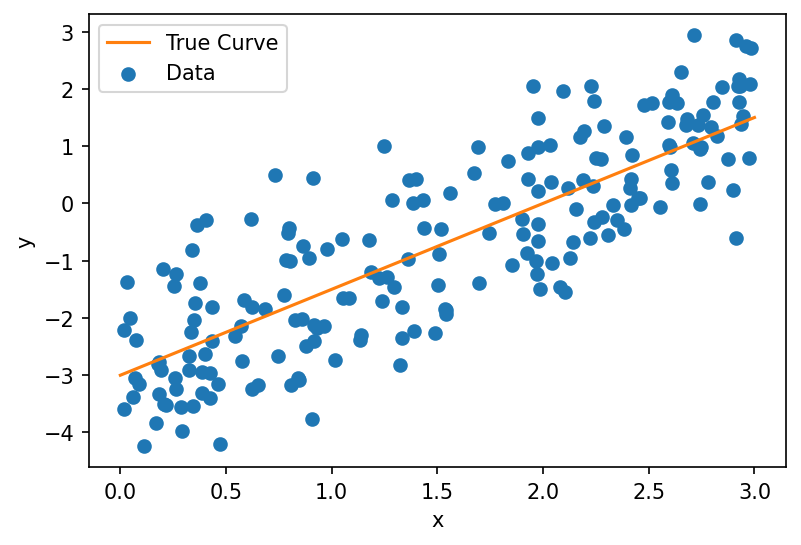

In [6]:
# Visualization
pl.figure(dpi = 150)
pl.scatter(xs, ys, label='Data')
pl.plot(jnp.linspace(x_min, x_max),
        alpha_true * jnp.linspace(x_min, x_max) + beta_true,
        label = 'True Curve', color = 'C1'
        )
pl.xlabel('x')
pl.ylabel('y')
pl.legend()

In [7]:
# Initial values of alpha, beta and gamma:
a, b, g = [0., 0., 1.]
key = random.PRNGKey(0)
# List to store the values returned by Gibbs sampling:
par_stor = []
for i in trange(5000):
    # Splitting so that we are generating different samples upon iteration
    key, _ = random.split(key)
    # Splitting to get keys for alpha, beta and gamma:
    keys = random.split(key, 3)

    # Sampling alpha:
    lam_1 = 1 + g * jnp.sum(xs**2)
    mu_1  = g * jnp.sum(xs * (ys - b)) / lam_1
    a     = random.normal(key = keys[0]) * jnp.sqrt(1 / lam_1) + mu_1

    # Sampling beta:
    lam_2 = N * g + 1
    mu_2  = g * jnp.sum(ys - xs * a) / lam_2
    b     = random.normal(key = keys[1]) * jnp.sqrt(1 / lam_2) + mu_2

    # Sampling gamma:
    g = random.gamma(key = keys[2], a = N/2 + 2) \
      / (1 + 0.5 * jnp.sum((ys - xs * a - b)**2))

    par_stor.append([a,b,g])

par_stor = jnp.array(par_stor)

  0%|          | 0/5000 [00:00<?, ?it/s]

In [9]:
# Discounting samples from burn-in:
par_stor = par_stor[2000:]
# Getting mean of the samples we drew:
par_stor.mean(0)

DeviceArray([ 1.5363231, -3.026613 ,  1.0816882], dtype=float32)

(array([ 1.,  5.,  1.,  6.,  4., 11.,  5.,  8., 24., 22., 25., 43., 48.,
        63., 46., 67., 64., 45., 70., 63., 50., 52., 41., 48., 29., 25.,
        30., 20., 19., 14., 12.,  8., 10.,  4.,  3.,  2.,  2.,  6.,  1.,
         3.]),
 array([0.77910155, 0.7955135 , 0.8119255 , 0.82833743, 0.8447494 ,
        0.86116135, 0.8775733 , 0.89398533, 0.9103973 , 0.92680925,
        0.9432212 , 0.9596332 , 0.97604513, 0.9924571 , 1.008869  ,
        1.0252811 , 1.041693  , 1.058105  , 1.0745169 , 1.0909289 ,
        1.1073408 , 1.1237528 , 1.1401647 , 1.1565768 , 1.1729887 ,
        1.1894007 , 1.2058126 , 1.2222246 , 1.2386366 , 1.2550485 ,
        1.2714605 , 1.2878724 , 1.3042845 , 1.3206964 , 1.3371084 ,
        1.3535203 , 1.3699323 , 1.3863442 , 1.4027562 , 1.4191681 ,
        1.4355801 ], dtype=float32),
 <a list of 40 Patch objects>)

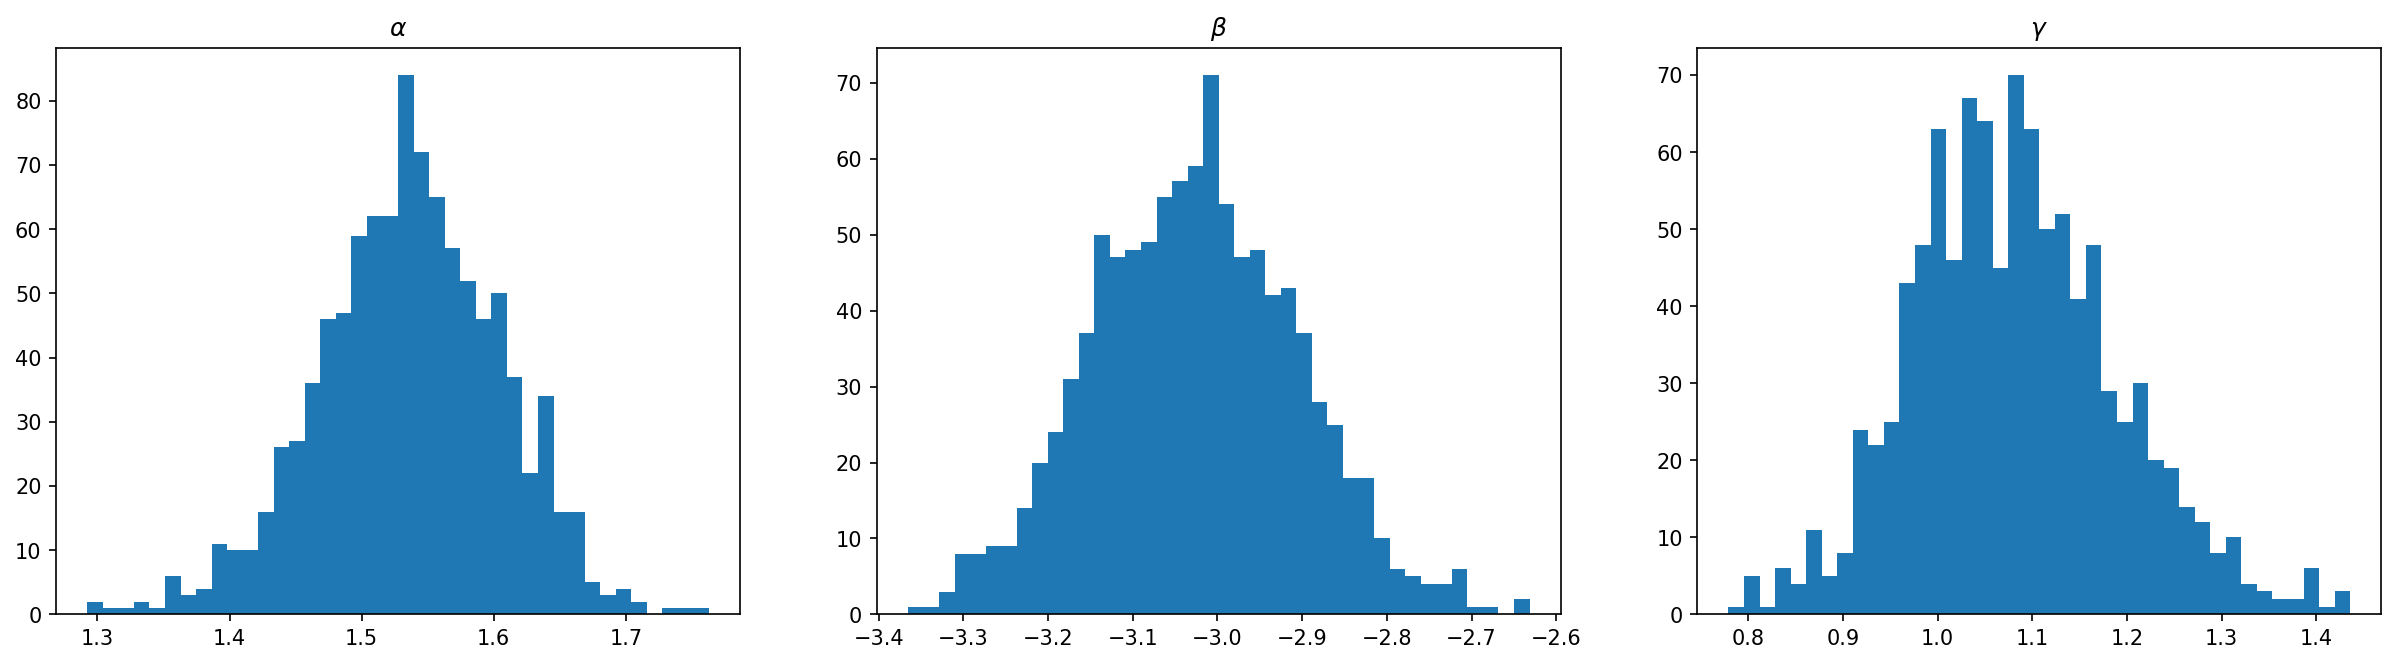

In [12]:
pl.figure(figsize = (20,5), dpi = 150)

pl.subplot(1, 3, 1)
pl.title(r'$\alpha$')
pl.hist(par_stor[:, 0], bins = 40)
pl.subplot(1, 3, 2)
pl.title(r'$\beta$')
pl.hist(par_stor[:, 1], bins = 40)
pl.subplot(1, 3, 3)
pl.title(r'$\gamma$')
pl.hist(par_stor[:, 2], bins = 40)

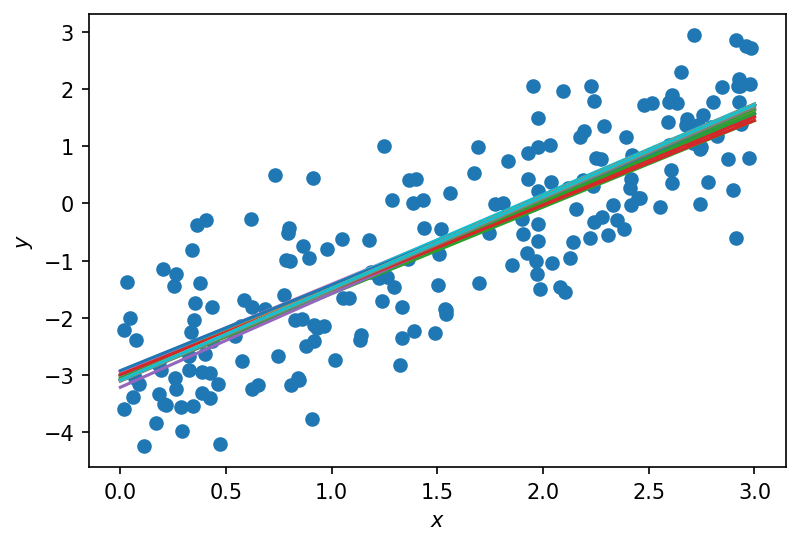

In [15]:
# Drawing lines using the samples we have:
pl.figure(dpi = 150)
pl.scatter(xs, ys, label='Data')
pl.xlabel(r'$x$')
pl.ylabel(r'$y$')

for i in onp.random.randint(0, 3000, size = 50):
    pl.plot(onp.linspace(x_min, x_max), 
            par_stor[i,0] * onp.linspace(x_min, x_max) + par_stor[i,1]
           )

(2) Gibbs sampling depends on deriving an analytical expression of the corresponding conditional posterior distributions. However, this cannot be done in many applications. Assume that you only have access to the unnormalized posterior, using the likelihood listed above and prior distributions: $p(\alpha) = \mathcal{N}(0, 1)$, $p(\beta) = \mathcal{N}(0, 1)$ and $p(\gamma) = \textrm{Gam(2, 1)}$. Implement the Metropolis algorithm to sample $5,000$ samples from the target posterior distribution $p(\alpha,\beta,\gamma\lvert x, y)$.  Discard the first 2,000 as a burn-in phase and plot a histogram generated from your samples. Please compare these histograms with the plots from Gibbs sampling. Also, please draw some samples of linear lines using $50$ samples you got.

In [31]:
# Using the metropolis function as discussed in class:
from jax import jit, vmap
from jax.lax import scan, cond
from functools import partial
def metropolis(log_prob, sigma):
    def init(rng_key, bounds):
        lb, ub = bounds
        dim = lb.shape[0]
        x0 = random.uniform(rng_key, (dim,), minval=lb, maxval=ub)
        return x0
    @partial(jit, static_argnums=(0,))
    def sample(num_samples, rng_key, init_state):
        def kernel(carry, i):
            key, state, logp = carry
            key, subkey = random.split(key)
            x = state + sigma * random.normal(subkey, state.shape)
            logp_prop = log_prob(x)
            u = random.uniform(key)
            cond = (u < jnp.exp(logp_prop - logp))
            state = jnp.where(cond, x, state)
            logp = jnp.where(cond, logp_prop, logp)
            return (key, state, logp), state
        logp = log_prob(init_state)
        _, samples = scan(kernel, (rng_key, init_state, logp), jnp.arange(num_samples))
        return samples
    return init, sample

In [32]:
def log_unnormalized_posterior(params, data):
    alpha, beta, gamma = params
    xs, ys = data
    N = xs.shape[0]

    return 0.5 * N * jnp.log(gamma) / 2 \
         - gamma / 2 * jnp.sum((ys - alpha * xs - beta) ** 2) \
         - alpha**2 / 2 - beta**2 / 2 + jnp.log(gamma) - gamma

In [35]:
log_prob = lambda params: log_unnormalized_posterior(params, (xs, ys))
# Choosing a small enough step-size:
step_size = 0.1
# Setting lower and upper bounds for the parameters:
lb = jnp.array([-5.0,-5.0, 0.0])
ub = jnp.array([ 5.0, 5.0, 5.0])

init_fn, sample_fn = metropolis(log_prob, step_size)
init_state         = init_fn(key, (lb, ub))
param_samples      = sample_fn(5000, key, init_state)

In [39]:
# Discounting samples from burn-in:
param_samples = param_samples[2000:]
# Getting mean of the samples we drew:
param_samples.mean(0)

DeviceArray([ 1.5053158, -2.967288 ,  0.5462664], dtype=float32)

(array([  3.,   6.,  14.,   3.,  11.,  18.,  15.,  63.,  35.,  56.,  87.,
         93., 163., 134., 176., 204., 167., 206., 171., 254., 161., 137.,
        121., 124., 131.,  99.,  35.,  50.,  51.,  49.,  60.,  37.,  19.,
         10.,   9.,  16.,   5.,   4.,   0.,   3.]),
 array([0.3202761 , 0.33244815, 0.3446202 , 0.35679224, 0.36896428,
        0.38113633, 0.39330837, 0.4054804 , 0.41765246, 0.4298245 ,
        0.44199654, 0.4541686 , 0.46634063, 0.47851267, 0.49068472,
        0.5028568 , 0.51502883, 0.5272009 , 0.5393729 , 0.55154496,
        0.563717  , 0.57588905, 0.5880611 , 0.60023314, 0.6124052 ,
        0.6245772 , 0.63674927, 0.6489213 , 0.66109335, 0.6732654 ,
        0.68543744, 0.6976095 , 0.7097815 , 0.7219536 , 0.7341256 ,
        0.74629766, 0.7584697 , 0.77064174, 0.7828138 , 0.79498583,
        0.8071579 ], dtype=float32),
 <a list of 40 Patch objects>)

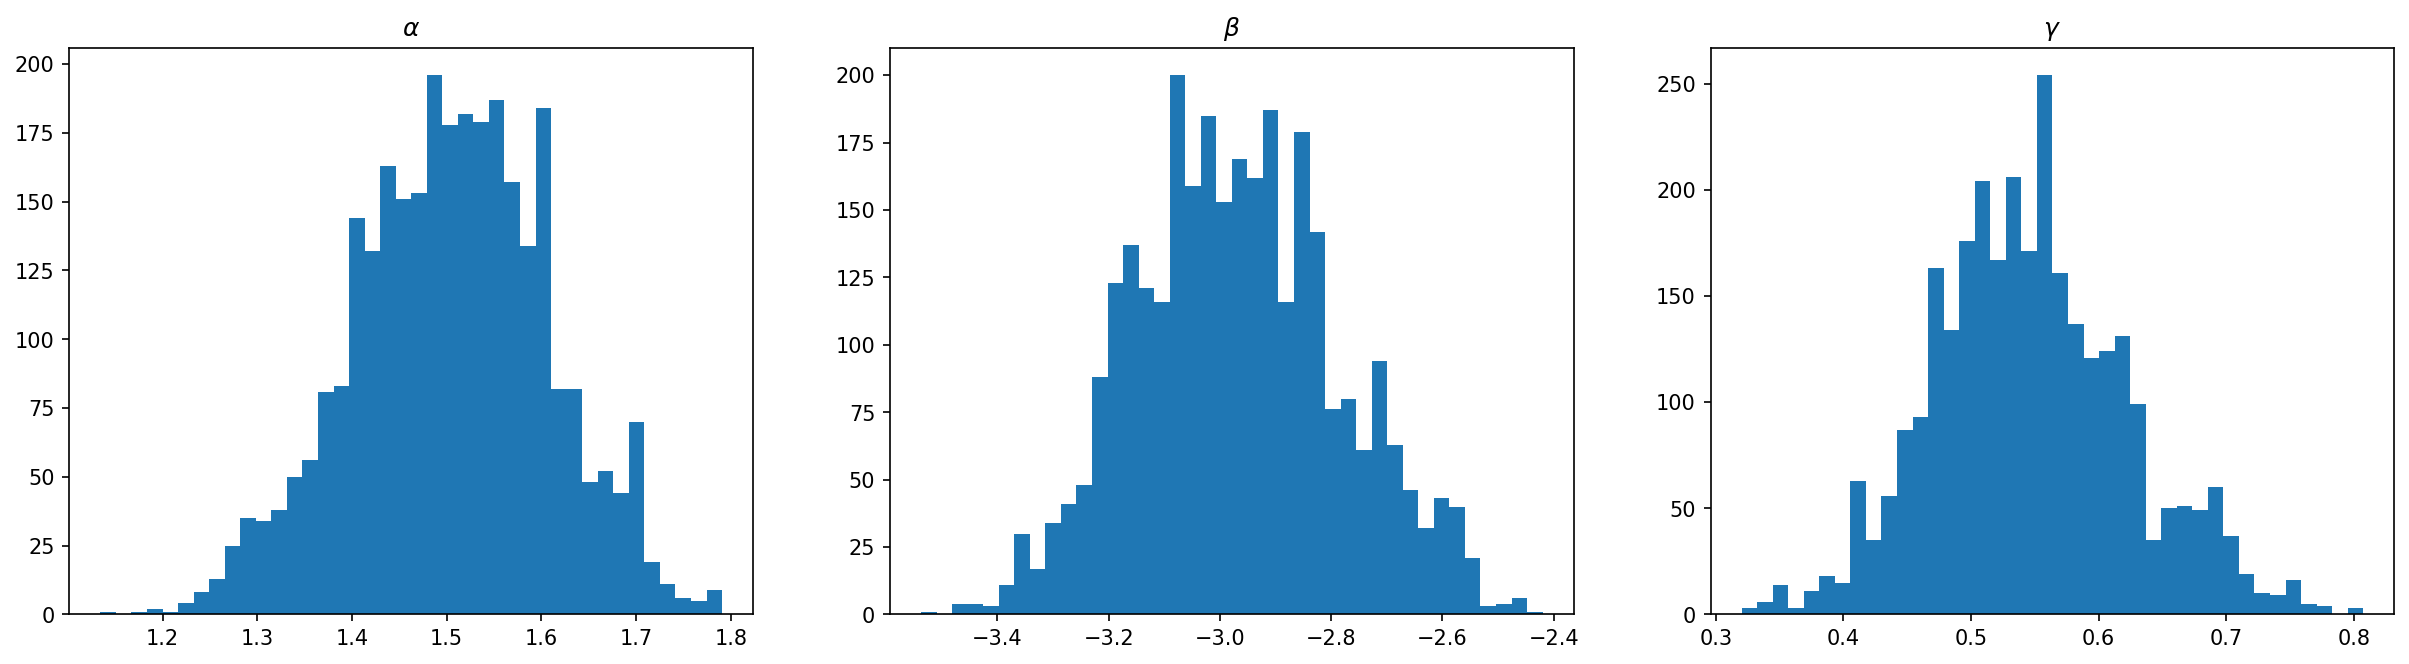

In [40]:
pl.figure(figsize = (20,5), dpi = 150)

pl.subplot(1, 3, 1)
pl.title(r'$\alpha$')
pl.hist(param_samples[:, 0], bins = 40)
pl.subplot(1, 3, 2)
pl.title(r'$\beta$')
pl.hist(param_samples[:, 1], bins = 40)
pl.subplot(1, 3, 3)
pl.title(r'$\gamma$')
pl.hist(param_samples[:, 2], bins = 40)

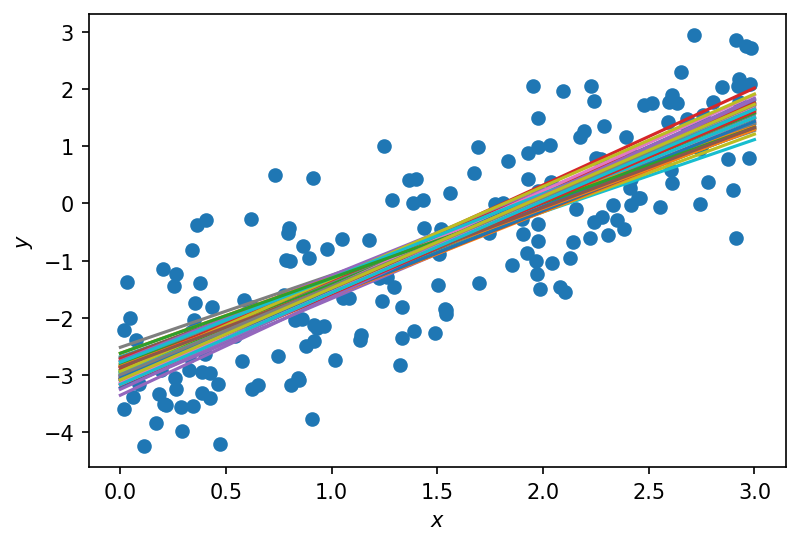

In [41]:
# Drawing lines using the samples we have:
pl.figure(dpi = 150)
pl.scatter(xs, ys, label='Data')
pl.xlabel(r'$x$')
pl.ylabel(r'$y$')

for i in onp.random.randint(0, 3000, size = 50):
    pl.plot(onp.linspace(x_min, x_max), 
            param_samples[i,0] * onp.linspace(x_min, x_max) + param_samples[i,1]
           )

# Problem 3 [40 Points]

(1) The Fisher Information Matrix is defined as:
$F = \mathbb{E}_{p(x\lvert \theta)}[\nabla_{\theta}\log p(x|\theta)\nabla_{\theta}\log p(x|\theta)^T]$
Prove that negative expected Hessian of log-likelihood is equal to the Fisher Information Matrix $F$.

### Answer

Taking $\text{L.H.S}$, we have that
\begin{align}
H_{i, j}[-\log p(x|\theta)] &= -\frac{\partial^2}{\partial x_i \partial x_j} \log p(x|\theta) = -\frac{\partial}{\partial x_j} \frac{\partial_{x_i} p(x|\theta)}{p(x_i | \theta)} = - J_{i, j} \left( \frac{\nabla p(x \vert \theta)}{p(x \vert \theta)} \right) \\[5pt]
\implies H[-\log p(x|\theta)] &= - J \left( \frac{\nabla p(x \vert \theta)}{p(x \vert \theta)} \right) \\[5pt]
    &= \frac{\nabla p(x \vert \theta) \, \nabla p(x \vert \theta)^{\text{T}} - H[p(x \vert \theta)] \, p(x \vert \theta)}{p(x \vert \theta) \, p(x \vert \theta)} \\[5pt]
    &= \frac{\nabla p(x \vert \theta) \, \nabla p(x \vert \theta)^{\text{T}}}{p(x \vert \theta) \, p(x \vert \theta)} - \frac{H[p(x \vert \theta)] \, p(x \vert \theta)}{p(x \vert \theta) \, p(x \vert \theta)} \\[5pt]
    &= \left( \frac{\nabla p(x \vert \theta)}{p(x \vert \theta)} \right) \left( \frac{\nabla p(x \vert \theta)}{p(x \vert \theta)}\right)^{\text{T}} - \frac{H[p(x \vert \theta)]}{p(x \vert \theta)}
\end{align}

Now taking expectation, we have
\begin{align}
    \implies \mathbb{E}_{p(x | \theta)} \left[H[-\log p(x|\theta)]\right] &= \mathbb{E}_{p(x \vert \theta)} \left[ \left( \frac{\nabla p(x \vert \theta)}{p(x \vert \theta)} \right) \left( \frac{\nabla p(x \vert \theta)}{p(x \vert \theta)}\right)^{\text{T}}\right] - \mathbb{E}_{p(x \vert \theta)} \left[ \frac{H[p(x \vert \theta)]}{p(x \vert \theta)} \right] \\[5pt]
    &= \mathbb{E}_{p(x \vert \theta)} \left[ \nabla \log p(x \vert \theta) \, \nabla \log p(x \vert \theta)^{\text{T}} \right] - \int \frac{H[p(x \vert \theta)]}{p(x \vert \theta)} p(x \vert \theta) \, \text{d}x \\[5pt]
    &= F - H[\int p(x \vert \theta) \, \text{d}x] \\[5pt]
    &= F - H[1] \\[5pt]
    &= F = \text{R.H.S} 
\end{align}

---

(2) Prove that Fisher Information Matrix F is the Hessian of KL-divergence between two distributions $p(x\lvert \theta)$ and $p(x\lvert \theta')$ with respect to $\theta'$ evaluated at $\theta' = \theta$.

### Answer
\begin{align}
\text{KL} [p(x \vert \theta) \, \Vert \, p(x \vert \theta')] = \mathop{\mathbb{E}}_{p(x \vert \theta)} [ \log p(x \vert \theta) ] - \mathop{\mathbb{E}}_{p(x \vert \theta)} [ \log p(x \vert \theta') ] \,
\end{align}

Taking first derivative w.r.t $\theta'$ gives

\begin{align}
    \nabla_{\theta'} \text{KL}[p(x \vert \theta) \, \Vert \, p(x \vert  \theta')] &= \nabla_{\theta'} \mathop{\mathbb{E}}_{p(x \vert \theta)} [ \log p(x \vert \theta) ] - \nabla_{\theta'} \mathop{\mathbb{E}}_{p(x \vert \theta)} [ \log p(x \vert \theta') ] \\[5pt]
        &= - \mathop{\mathbb{E}}_{p(x \vert \theta)} [ \nabla_{\theta'} \log p(x \vert \theta') ] \\[5pt]
        &= - \int p(x \vert \theta) \nabla_{\theta'} \log p(x \vert \theta') \, \text{d}x \, .
\end{align}

Second derivative yields
\begin{align}
    \nabla_{\theta'}^2 \, \text{KL}[p(x \vert \theta) \, \Vert \, p(x \vert \theta')] &= - \int p(x \vert \theta) \, \nabla_{\theta'}^2 \log p(x \vert \theta') \, \text{d}x \\[5pt]
\end{align}

Thus, we have that the Hessian w.r.t $\theta'$ evaluated at $\theta' = \theta$ is
\begin{align}
    H_{\text{KL}[p(x \vert \theta) \, \Vert \, p(x \vert \theta')]} &= - \int p(x \vert \theta) \, \left. \nabla_{\theta'}^2 \log p(x \vert \theta') \right\vert_{\theta' = \theta} \, \text{d}x \\[5pt]
        &= - \int p(x \vert \theta) \, H_{\log p(x \vert \theta)} \, \text{d}x \\[5pt]
        &= - \mathop{\mathbb{E}}_{p(x \vert \theta)} [H_{\log p(x \vert \theta)}] \\[5pt]
        &= F \, .
\end{align}

---

(3) Consider the following parametrization for $p(\mathbf{x};\alpha, \beta)$ 

\begin{align}
    p(\mathbf{x};\alpha, \beta) = \frac{1}{2 \pi} \exp \left[-\frac{1}{2}\left(x_1 - \left[3 \alpha + \frac{1}{3} \beta \right]\right)^2 - \frac{1}{2} (x_2 - \frac{1}{3} \alpha)^2 \right]
\end{align}


In this question, we will study different techniques for optimizing the parameters $\alpha$ and $\beta$, where the training data $p^\star(\mathbf{x})$ is generated at N = 200,000 datapoints using $\alpha = 0$ and $\beta = 0$. The objective function to be considered is the cross-entropy loss

\begin{align}
    \mathcal{L}(\alpha, \beta) = -\mathbb{E}_{p^\star(\mathbf{x})} [\log p(\mathbf{x}; \alpha, \beta)]
\end{align}

For all the questions , please start your initial guess for the parameters at $(\alpha_0, \beta_0)=(1, -1)$ and determine a suitable learning rate for each case considered. Write down your own Python code to implement the following methods.

(3a) Use gradient descent to find $\alpha$ and $\beta$. Also report the loss curve and the parameter trajectory over a contour plot in the parameter space.

(3b) Given a number of data $X = \{x_1, ..., x_n\}$, the empirical Fisher Information Matrix could be written as:

$F = \frac{1}{n}\sum_{i=1}^n[\nabla_{\theta}\log p(x_i \lvert \theta)\nabla_{\theta}\log p(x_i \lvert \theta)^T]$

Conduct a simulation study using the natural gradient descent update rule:

$\theta = \theta - \eta F^{-1}g(\theta)$

to find $\alpha$ and $\beta$, where $g(\theta)$ is the gradient of the parameters. Contrast the trajectory you observe for (3a) and (3b), and briefly describe what we can infer from this result.

In [51]:
def p(params, X):
    X1 = X[:, 0]
    X2 = X[:, 1]

    alpha, beta = params
    return (0.5 / jnp.pi) * jnp.exp(-0.5 * (X1 - (3 * alpha + (1/3) * beta))**2
                                    -0.5 * (X2 - (1/3) * alpha)**2
                                   )

@jax.jit
def loss(params, X):
    return -jnp.log(p(params, X) + 1e-7).mean()

In [52]:
# Generating the samples from pstar:
X = jax.random.normal(jax.random.PRNGKey(0), (200000, 2))
# Derivative of loss function:
grad_loss = jax.jit(jax.grad(loss))

In [63]:
# Initializing (alpha0, beta0) = (-1, 1):
params = jnp.array([-1., 1.])

# Gradient descent
# Learning Rate
eta   = 1e-2
n_its = 100000

loss_history   = [loss(params, X)]
params_history = [params]
for i in trange(n_its):
    g      = grad_loss(params, X)
    params = jax.tree_multimap(lambda x, g: x - eta * g, params, g)

    # Track progress:
    loss_history   = loss_history + [loss(params, X)]
    params_history = params_history + [params]
    
# Tracking for comparison later
loss_history_gd   = loss_history
params_history_gd = jnp.array(params_history)

  0%|          | 0/100000 [00:00<?, ?it/s]

In [66]:
# Defining functions for computing the Fisher-Information matrix:
def per_example_p(params, X):
    X1 = X[0]
    X2 = X[1]

    alpha, beta = params

    return (0.5 / jnp.pi) * jnp.exp(-0.5 * (X1 - (3 * alpha + (1/3) * beta))**2
                                    -0.5 * (X2 - (1/3) * alpha)**2
                                   )

@jax.jit
def per_example_loss(params, X):
    return -jnp.sum(jnp.log((per_example_p(params, X) + 1e-7)))

grad_per_example_loss = jax.jit(jax.grad(per_example_loss))

# Function utilized for computing Fisher Matrix:
@jax.jit
def fisher_matrix(params, X):
    # Computing the Fisher information matrix as sum of outer products
    G = (jax.vmap(grad_per_example_loss, (None, 0))(params, X)).T
    F = 1 / X.shape[0] * (G @ G.T)
    return F

In [71]:
# Initializing (alpha0, beta0) = (-1, 1):
params = jnp.array([-1., 1.])

# Gradient descent
# Learning Rate
eta   = 1e-2
n_its = 1000
# Natural gradient descent\
loss_history   = [loss(params, X)]
params_history = [params]
for i in trange(n_its):
    g = grad_loss(params, X)
    # Now, we compute the empirical Fisher Information Matrix:
    F = fisher_matrix(params, X)
    # Updating parameters:
    params = jax.tree_multimap(lambda x, G: x - eta * G, params,
                               jnp.linalg.lstsq(F, g)[0])

    # Track progress:
    loss_history   = loss_history + [loss(params, X)]
    params_history = params_history + [params]
    
# Tracking for comparison later
loss_history_ngd   = loss_history
params_history_ngd = jnp.array(params_history)

  0%|          | 0/1000 [00:00<?, ?it/s]

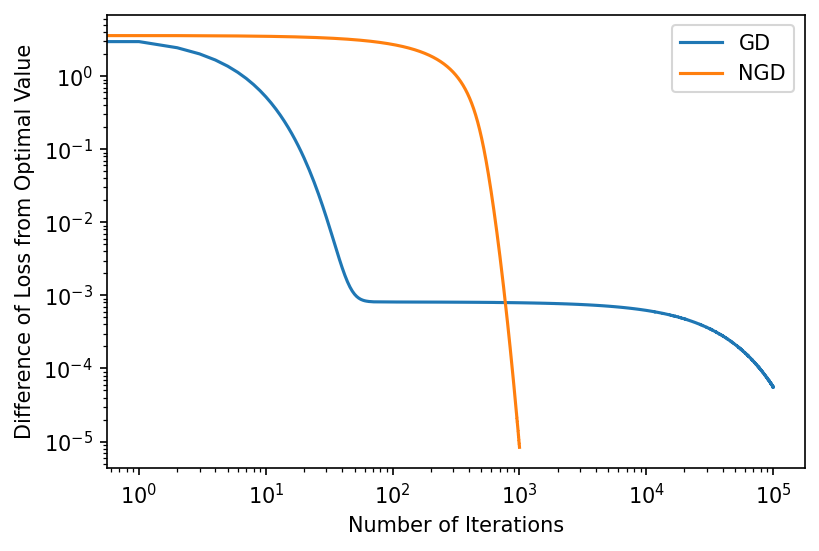

In [87]:
pl.figure(dpi = 150)
pl.loglog(jnp.array(loss_history_gd) - loss((0, 0), X), label = 'GD')
pl.loglog(jnp.array(loss_history_ngd) - loss((0, 0), X), label = 'NGD')
pl.xlabel('Number of Iterations')
pl.ylabel('Difference of Loss from Optimal Value')
pl.legend()

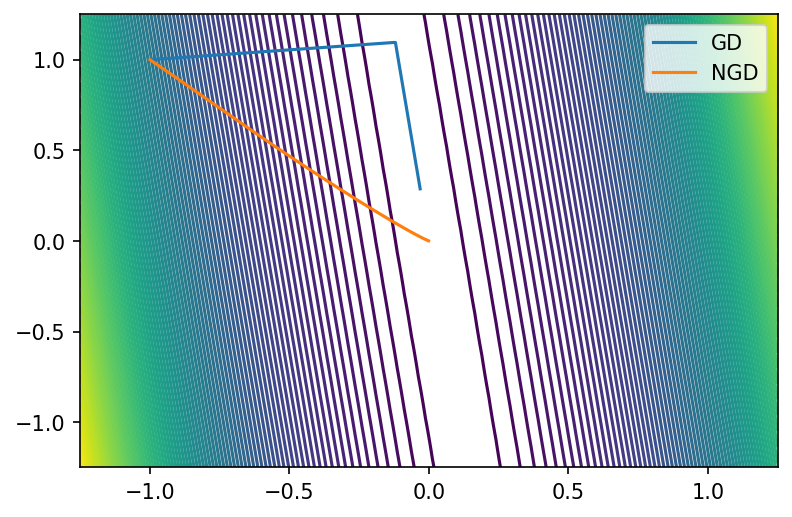

In [99]:
# Grid for generating loss contours:
alpha_grid            = jnp.linspace(-1.25, 1.25, 100)
beta_grid             = jnp.linspace(-1.25, 1.25, 100)
alpha_grid, beta_grid = jnp.meshgrid(alpha_grid, beta_grid)

params_grid = jnp.vstack([alpha_grid.ravel(), beta_grid.ravel()]).T
# Plotting the progress on the loss landscape:
pl.figure(dpi = 150)
pl.contour(alpha_grid, beta_grid, 
           jax.vmap(loss, (0, None))(params_grid, X).reshape(100, 100), 
           100
          )
pl.plot(params_history_gd[:, 0], params_history_gd[:, 1], label = 'GD')
pl.plot(params_history_ngd[:, 0], params_history_ngd[:, 1], label = 'NGD')
pl.legend()

As can be observed, on this ill-conditioned landscape, gradient descent requires a much larger number of iterations to arrive at the exact minimum. As can be observed, GD gets stuck in a valley after the initial progress where the gradients are much smaller. However, the preconditioning of the Fisher Information matrix in the case of natural gradient descent allows us to arrive at the correct minimum with fewer iterations.